<a href="https://colab.research.google.com/github/Vengalagagan/NLP/blob/main/Lab10_tSNE_Embeddings_V_Gagan_2403a52222.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install Gensim

In [3]:
!pip install gensim

Input libraries

In [4]:
from gensim.models import KeyedVectors
import gensim.downloader as api
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

Load pre-trained Word2Vec model

In [6]:
print("Downloading Word2Vec model...")
word_vectors = api.load("word2vec-google-news-300")
print("Word2Vec model loaded successfully.")

[==================================================] 100.0% 1662.8/1662.8MB downloaded
Word2Vec model loaded successfully.


Load pre-trained glove model

In [7]:
print("Downloading GloVe model...")
glove_vectors = api.load("glove-wiki-gigaword-300")
print("GloVe model loaded successfully.")

[==================================================] 100.0% 376.1/376.1MB downloaded
GloVe model loaded successfully.


Select Word List

In [9]:
word_list = [

    # Sports
    "football", "cricket", "tennis", "basketball", "hockey",

    # Food
    "pizza", "burger", "pasta", "sandwich", "salad",

    # Music
    "guitar", "piano", "violin", "drums", "flute",

    # Weather
    "storm", "cloud", "snow", "thunder", "lightning",

    # Space
    "planet", "galaxy", "asteroid", "comet", "satellite",

    # Professions
    "engineer", "lawyer", "pilot", "chef", "architect",

    # Household Items
    "table", "chair", "sofa", "lamp", "curtain",

    # Emotions
    "happiness", "anger", "fear", "surprise", "sadness"
]

In [13]:
# Create vector list
vectors = []

for word in word_list:
    if word in word_vectors:
        vectors.append(word_vectors[word])

# Convert to NumPy array
vectors_word2vec = np.array(vectors)

# Print results
print("Total words:", len(word_list))
print("Vectors found:", len(vectors))
print("Shape:", vectors_word2vec.shape)
print("First vector:", vectors_word2vec[0])

Total words: 40
Vectors found: 40
Shape: (40, 300)
First vector: [-9.76562500e-02  3.19824219e-02  2.57812500e-01 -4.15039062e-02
  1.01562500e-01 -1.00585938e-01  1.46484375e-01 -1.99218750e-01
  1.53320312e-01  6.34765625e-02  8.39843750e-02 -3.00781250e-01
  6.34765625e-02  2.08984375e-01 -2.11914062e-01  1.88476562e-01
 -8.34960938e-02  3.28125000e-01  2.79296875e-01 -1.40625000e-01
 -1.68945312e-01  2.04101562e-01  4.90722656e-02 -6.98852539e-03
  9.42382812e-02  9.84191895e-04  3.12500000e-02  2.48046875e-01
  3.35937500e-01  2.63671875e-01  5.68847656e-02  3.04687500e-01
  1.21582031e-01 -1.97265625e-01  1.72119141e-02  9.96093750e-02
  2.27539062e-01 -1.20605469e-01  1.23535156e-01  3.78906250e-01
  2.36816406e-02 -1.86523438e-01  6.29882812e-02  1.52343750e-01
  3.73535156e-02 -1.69921875e-01  1.06445312e-01 -4.98046875e-02
 -6.20117188e-02  1.68945312e-01  4.41894531e-02  2.78320312e-02
 -1.10839844e-01  4.49218750e-02  2.78320312e-02 -4.45312500e-01
  3.49121094e-02 -6.22558

In [14]:
# Create empty list
vectors = []

# Collect vectors if word exists in GloVe model
for word in word_list:
    if word in glove_vectors:
        vector = glove_vectors[word]
        vectors.append(vector)

# Convert to NumPy array
vectors_glove = np.array(vectors)

print("Total selected words:", len(word_list))
print("Vectors found:", len(vectors))
print("Vector shape:", vectors_glove.shape)

if len(vectors_glove) > 0:
    print("First vector:", vectors_glove[0])

Total selected words: 40
Vectors found: 40
Vector shape: (40, 300)
First vector: [ 1.0569e-02  1.4321e+00  4.3626e-01  3.2178e-01  1.9188e-01 -6.1888e-02
 -1.9103e-01  4.5398e-01 -1.7038e-01 -4.2369e-01 -4.0740e-01  4.6453e-01
  3.2318e-01 -1.4440e-02  2.7276e-01  1.5969e-01 -1.4704e-01 -4.6566e-01
  1.0306e-01 -9.5177e-01  2.8870e-01  3.2979e-01 -4.4688e-01  8.0839e-01
 -1.4175e-01 -5.2176e-02 -5.5731e-01  4.0684e-01 -5.2070e-02 -3.5442e-01
  4.3672e-01 -2.4065e-01 -3.1001e-02  4.6315e-01 -1.7289e+00  3.4553e-01
  2.9099e-01  5.1499e-01 -7.4436e-02 -4.4231e-01  2.1949e-01 -6.8234e-01
 -2.0027e-01 -8.5580e-03  5.2725e-01 -2.8092e-01  2.5786e-01  5.3114e-01
  4.3228e-02  7.1035e-02 -7.6478e-01  2.6675e-01 -3.0521e-01 -4.3119e-02
 -1.5533e-01  5.0910e-01  1.7340e-01  4.0201e-01  1.9567e-01 -6.1010e-01
 -1.8047e-01  1.2477e-02 -4.7256e-01 -4.1116e-01 -6.0993e-01 -5.7438e-01
 -1.9372e-01  5.4452e-02  2.1020e-01 -6.6130e-01  2.1204e-01  2.5898e-01
 -6.4374e-01  4.7419e-02 -6.6838e-01  6.828

Apply t-SNE

In [15]:
# Apply t-SNE to reduce dimensions to 2D
tsne = TSNE(n_components=2, random_state=42)

# Transform vectors
tsne_coordinates = tsne.fit_transform(vectors_word2vec)

# Print shapes
print("Original shape:", vectors_word2vec.shape)
print("Reduced shape:", tsne_coordinates.shape)

# Print first 5 results
print("\nFirst 5 t-SNE coordinates:")
print(tsne_coordinates[:5])

print("\nFirst 5 original vectors:")
print(vectors_word2vec[:5])

Original shape: (40, 300)
Reduced shape: (40, 2)

First 5 t-SNE coordinates:
[[2.4885156 4.0576406]
 [3.1264334 4.215402 ]
 [2.756341  4.032468 ]
 [2.666328  4.055114 ]
 [2.8355587 4.1218295]]

First 5 original vectors:
[[-0.09765625  0.03198242  0.2578125  ...  0.00201416 -0.12158203
   0.15820312]
 [-0.3671875  -0.12158203  0.28515625 ...  0.24902344 -0.14257812
   0.04150391]
 [-0.2890625  -0.08642578  0.23144531 ...  0.13964844 -0.18066406
   0.08154297]
 [-0.00854492  0.08447266  0.21289062 ...  0.22167969  0.04663086
   0.25976562]
 [-0.25976562  0.02160645  0.4140625  ...  0.14160156 -0.37695312
  -0.13476562]]


Plot using word2vec

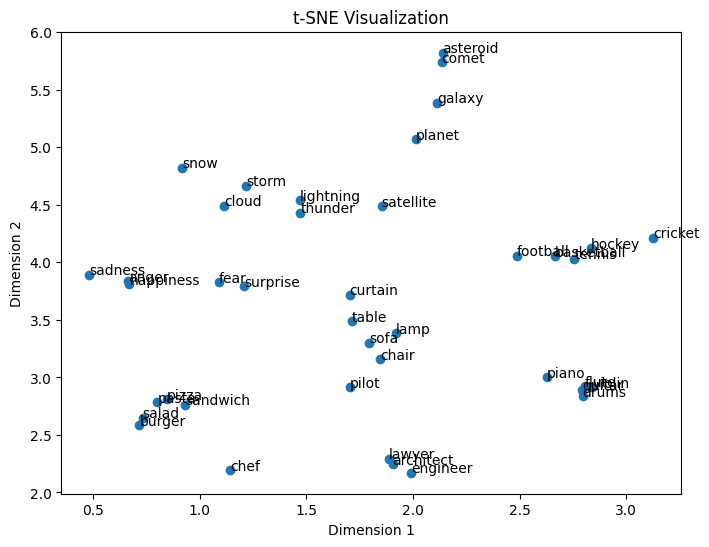

In [16]:
import matplotlib.pyplot as plt

# Create figure
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot
ax.scatter(tsne_coordinates[:, 0], tsne_coordinates[:, 1])

# Add word labels
for i in range(len(word_list)):
    ax.text(tsne_coordinates[i, 0],
            tsne_coordinates[i, 1],
            word_list[i])

# Show plot
plt.title("t-SNE Visualization")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

For Glove

In [17]:
# Apply t-SNE (simple version)
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform GloVe vectors
tsne_coordinates = tsne.fit_transform(vectors_glove)

# Print shapes
print("Original shape:", vectors_glove.shape)
print("Reduced shape:", tsne_coordinates.shape)

# Show first 5 reduced vectors
print("\nFirst 5 t-SNE coordinates:")
print(tsne_coordinates[:5])

# Show first 5 original GloVe vectors
print("\nFirst 5 original GloVe vectors:")
print(vectors_glove[:5])

Original shape: (40, 300)
Reduced shape: (40, 2)

First 5 t-SNE coordinates:
[[ 2.4329202  -0.7759312 ]
 [ 2.7565591  -0.82178885]
 [ 2.6012576  -0.7346091 ]
 [ 2.35758    -0.7516996 ]
 [ 2.3919237  -0.83282024]]

First 5 original GloVe vectors:
[[ 0.010569  1.4321    0.43626  ... -0.32491   0.13853  -0.27496 ]
 [-0.23123  -0.18504   0.9727   ... -0.13006   0.31948   0.023354]
 [ 0.46643  -0.052652  0.55868  ... -0.038456  0.9615   -0.12443 ]
 [ 0.14284   0.51405   0.62334  ... -0.763     0.024886 -0.25128 ]
 [ 0.088442  0.58762   0.2799   ... -0.13763   0.38635  -0.46242 ]]


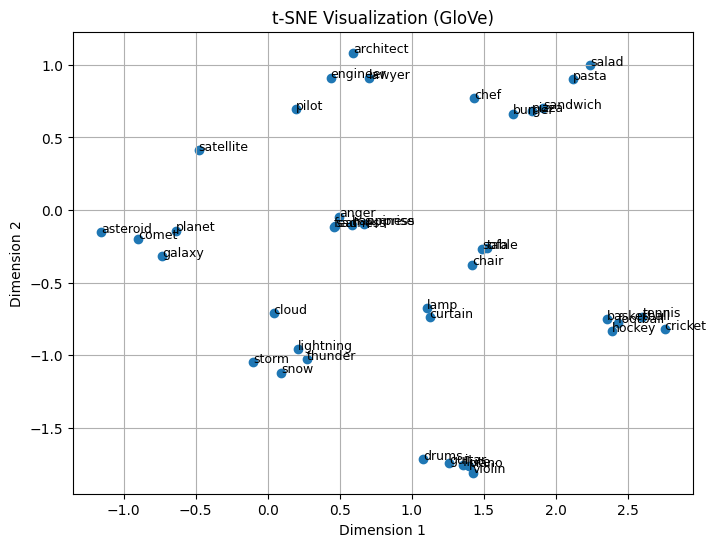

In [18]:
import matplotlib.pyplot as plt

# Create plot
plt.figure(figsize=(8, 6))

# Scatter points
plt.scatter(tsne_coordinates[:, 0], tsne_coordinates[:, 1])

# Add word labels
for i in range(len(word_list)):
    plt.text(tsne_coordinates[i, 0],
             tsne_coordinates[i, 1],
             word_list[i],
             fontsize=9)

# Add title and labels
plt.title("t-SNE Visualization (GloVe)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

plt.grid(True)
plt.show()